## Hospitality Analysis - Project

In this project, I have used six datasets.
Datasets are :- 
1. dim_date.csv
2. dim_hotels.csv
3. dim_rooms.csv
4. fact_aggregated_bookings.csv
5. fact_bookings.csv
6. new_data_august.csv

and I have solved some industry based question with help of python library `pandas`

**Pandas -** To do analyzing, cleaning, exploring, and manipulating data.<br>
**Matplotlib -** To do data visualization.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

### Data Read and Data Exploration

#### Fact_bookings Exploration -

In [2]:
df_bookings = pd.read_csv("datasets/fact_bookings.csv")
df_bookings.head(5)

,booking_id,property_id,booking_date,check_in_date,checkout_date,no_guests,room_category,booking_platform,ratings_given,booking_status,revenue_generated,revenue_realized
0,May012216558RT11,16558,27-04-22,1/5/2022,2/5/2022,-3.0,RT1,direct online,1.0,Checked Out,10010,10010
1,May012216558RT12,16558,30-04-22,1/5/2022,2/5/2022,2.0,RT1,others,NaN,Cancelled,9100,3640
2,May012216558RT13,16558,28-04-22,1/5/2022,4/5/2022,2.0,RT1,logtrip,5.0,Checked Out,9100000,9100
3,May012216558RT14,16558,28-04-22,1/5/2022,2/5/2022,-2.0,RT1,others,NaN,Cancelled,9100,3640
4,May012216558RT15,16558,27-04-22,1/5/2022,2/5/2022,4.0,RT1,direct online,5.0,Checked Out,10920,10920


In [3]:
df_bookings.shape

(134590, 12)

In [4]:
df_bookings.columns

Index(['booking_id', 'property_id', 'booking_date', 'check_in_date',
       'checkout_date', 'no_guests', 'room_category', 'booking_platform',
       'ratings_given', 'booking_status', 'revenue_generated',
       'revenue_realized'],
      dtype='object')

In [5]:
df_bookings.room_category.unique()

array(['RT1', 'RT2', 'RT3', 'RT4'], dtype=object)

In [6]:
df_bookings.booking_platform.unique()

array(['direct online', 'others', 'logtrip', 'tripster', 'makeyourtrip',
       'journey', 'direct offline'], dtype=object)

In [7]:
df_bookings.booking_platform.value_counts()

booking_platform
others            55066
makeyourtrip      26898
logtrip           14756
direct online     13379
tripster           9630
journey            8106
direct offline     6755
Name: count, dtype: int64

In [8]:
df_bookings.describe()

,property_id,no_guests,ratings_given,revenue_generated,revenue_realized
count,134590.000000,134587.000000,56683.000000,1.345900e+05,134590.000000
mean,18061.113493,2.036170,3.619004,1.537805e+04,12696.123256
std,1093.055847,1.034885,1.235009,9.303604e+04,6928.108124
min,16558.000000,-17.000000,1.000000,6.500000e+03,2600.000000
25%,17558.000000,1.000000,3.000000,9.900000e+03,7600.000000
50%,17564.000000,2.000000,4.000000,1.350000e+04,11700.000000
75%,18563.000000,2.000000,5.000000,1.800000e+04,15300.000000
max,19563.000000,6.000000,5.000000,2.856000e+07,45220.000000


In [9]:
# Here, I have read all the datasets
df_date = pd.read_csv("datasets/dim_date.csv")
df_hotels = pd.read_csv("datasets/dim_hotels.csv")
df_rooms = pd.read_csv("datasets/dim_rooms.csv")
df_agg_bookings = pd.read_csv("datasets/fact_aggregated_bookings.csv")

#### dim_date Exploration -

In [10]:
df_date.head()

,date,mmm yy,week no,day_type
0,01-May-22,May 22,W 19,weekend
1,02-May-22,May 22,W 19,weekeday
2,03-May-22,May 22,W 19,weekeday
3,04-May-22,May 22,W 19,weekeday
4,05-May-22,May 22,W 19,weekeday


#### dim_hotels Exploration -

In [11]:
df_hotels.shape

(25, 4)

In [12]:
df_hotels.head()

,property_id,property_name,category,city
0,16558,Atliq Grands,Luxury,Delhi
1,16559,Atliq Exotica,Luxury,Mumbai
2,16560,Atliq City,Business,Delhi
3,16561,Atliq Blu,Luxury,Delhi
4,16562,Atliq Bay,Luxury,Delhi


In [13]:
df_hotels.category.value_counts()

category
Luxury      16
Business     9
Name: count, dtype: int64

In [14]:
df_hotels.property_name.unique()  # there are seven unique hotels

array(['Atliq Grands', 'Atliq Exotica', 'Atliq City', 'Atliq Blu',
       'Atliq Bay', 'Atliq Palace', 'Atliq Seasons'], dtype=object)

In [15]:
df_hotels.city.value_counts()

city
Mumbai       8
Hyderabad    6
Bangalore    6
Delhi        5
Name: count, dtype: int64

#### dim_rooms Exploration -

In [16]:
df_rooms.head()    # there are four types of room

,room_id,room_class
0,RT1,Standard
1,RT2,Elite
2,RT3,Premium
3,RT4,Presidential


#### fact_aggregated_bookings Exploration -

In [17]:
df_agg_bookings.head()

,property_id,check_in_date,room_category,successful_bookings,capacity
0,16559,1-May-22,RT1,25,30.0
1,19562,1-May-22,RT1,28,30.0
2,19563,1-May-22,RT1,23,30.0
3,17558,1-May-22,RT1,30,19.0
4,16558,1-May-22,RT1,18,19.0


#### => Find out unique property_id

In [18]:
df_agg_bookings.property_id.unique()

array([16559, 19562, 19563, 17558, 16558, 17560, 19558, 19560, 17561,
       16560, 16561, 16562, 16563, 17559, 17562, 17563, 18558, 18559,
       18561, 18562, 18563, 19559, 19561, 17564, 18560], dtype=int64)

#### => Find out total bookings per property_id

In [19]:
df_agg_bookings.groupby("property_id")["successful_bookings"].sum()

property_id
16558    3153
16559    7338
16560    4693
16561    4418
16562    4820
16563    7211
17558    5053
17559    6142
17560    6013
17561    5183
17562    3424
17563    6337
17564    3982
18558    4475
18559    5256
18560    6638
18561    6458
18562    7333
18563    4737
19558    4400
19559    4729
19560    6079
19561    5736
19562    5812
19563    5413
Name: successful_bookings, dtype: int64

#### => Find out on which days bookings are greater than capacity

In [20]:
df_agg_bookings[df_agg_bookings.successful_bookings>df_agg_bookings.capacity]

,property_id,check_in_date,room_category,successful_bookings,capacity
3,17558,1-May-22,RT1,30,19.0
12,16563,1-May-22,RT1,100,41.0
4136,19558,11-Jun-22,RT2,50,39.0
6209,19560,2-Jul-22,RT1,123,26.0
8522,19559,25-Jul-22,RT1,35,24.0
9194,18563,31-Jul-22,RT4,20,18.0


#### => Find out property_id that have highest capacity

In [21]:
df_agg_bookings.capacity.max()

50.0

In [22]:
df_agg_bookings[df_agg_bookings.capacity==df_agg_bookings.capacity.max()]

,property_id,check_in_date,room_category,successful_bookings,capacity
27,17558,1-May-22,RT2,38,50.0
128,17558,2-May-22,RT2,27,50.0
229,17558,3-May-22,RT2,26,50.0
328,17558,4-May-22,RT2,27,50.0
428,17558,5-May-22,RT2,29,50.0
...,...,...,...,...,...
8728,17558,27-Jul-22,RT2,22,50.0
8828,17558,28-Jul-22,RT2,21,50.0
8928,17558,29-Jul-22,RT2,23,50.0
9028,17558,30-Jul-22,RT2,32,50.0


### Data Cleaning

In [23]:
df_bookings.describe()

,property_id,no_guests,ratings_given,revenue_generated,revenue_realized
count,134590.000000,134587.000000,56683.000000,1.345900e+05,134590.000000
mean,18061.113493,2.036170,3.619004,1.537805e+04,12696.123256
std,1093.055847,1.034885,1.235009,9.303604e+04,6928.108124
min,16558.000000,-17.000000,1.000000,6.500000e+03,2600.000000
25%,17558.000000,1.000000,3.000000,9.900000e+03,7600.000000
50%,17564.000000,2.000000,4.000000,1.350000e+04,11700.000000
75%,18563.000000,2.000000,5.000000,1.800000e+04,15300.000000
max,19563.000000,6.000000,5.000000,2.856000e+07,45220.000000


**Above, we can see that `no_guest` is **'-17'**. which is not possible. there is data error so I have to clean it.**

In [24]:
df_bookings.shape

(134590, 12)

**Total no_of records are 134590. There are multiple way to clean the data it's totally depends on the bussines requirment.
so, here I'm just removing those data which has negative `no_guests`.**

In [25]:
df_bookings[df_bookings.no_guests<=0]

,booking_id,property_id,booking_date,check_in_date,checkout_date,no_guests,room_category,booking_platform,ratings_given,booking_status,revenue_generated,revenue_realized
0,May012216558RT11,16558,27-04-22,1/5/2022,2/5/2022,-3.0,RT1,direct online,1.0,Checked Out,10010,10010
3,May012216558RT14,16558,28-04-22,1/5/2022,2/5/2022,-2.0,RT1,others,NaN,Cancelled,9100,3640
17924,May122218559RT44,18559,12/5/2022,12/5/2022,14-05-22,-10.0,RT4,direct online,NaN,No Show,20900,20900
18020,May122218561RT22,18561,8/5/2022,12/5/2022,14-05-22,-12.0,RT2,makeyourtrip,NaN,Cancelled,9000,3600
18119,May122218562RT311,18562,5/5/2022,12/5/2022,17-05-22,-6.0,RT3,direct offline,5.0,Checked Out,16800,16800
18121,May122218562RT313,18562,10/5/2022,12/5/2022,17-05-22,-4.0,RT3,direct online,NaN,Cancelled,14400,5760
56715,Jun082218562RT12,18562,5/6/2022,8/6/2022,13-06-22,-17.0,RT1,others,NaN,Checked Out,6500,6500
119765,Jul202219560RT220,19560,19-07-22,20-07-22,22-07-22,-1.0,RT2,others,NaN,Checked Out,13500,13500
134586,Jul312217564RT47,17564,30-07-22,31-07-22,1/8/2022,-4.0,RT4,logtrip,2.0,Checked Out,38760,38760


In [26]:
df_bookings = df_bookings[df_bookings.no_guests>0]

In [27]:
df_bookings.shape

(134578, 12)

**Here, we can see no_of records has been reduce from 134590 to 134578.**

In [28]:
df_bookings

,booking_id,property_id,booking_date,check_in_date,checkout_date,no_guests,room_category,booking_platform,ratings_given,booking_status,revenue_generated,revenue_realized
1,May012216558RT12,16558,30-04-22,1/5/2022,2/5/2022,2.0,RT1,others,NaN,Cancelled,9100,3640
2,May012216558RT13,16558,28-04-22,1/5/2022,4/5/2022,2.0,RT1,logtrip,5.0,Checked Out,9100000,9100
4,May012216558RT15,16558,27-04-22,1/5/2022,2/5/2022,4.0,RT1,direct online,5.0,Checked Out,10920,10920
5,May012216558RT16,16558,1/5/2022,1/5/2022,3/5/2022,2.0,RT1,others,4.0,Checked Out,9100,9100
6,May012216558RT17,16558,28-04-22,1/5/2022,6/5/2022,2.0,RT1,others,NaN,Cancelled,9100,3640
...,...,...,...,...,...,...,...,...,...,...,...,...
134584,Jul312217564RT45,17564,30-07-22,31-07-22,1/8/2022,2.0,RT4,others,2.0,Checked Out,32300,32300
134585,Jul312217564RT46,17564,29-07-22,31-07-22,3/8/2022,1.0,RT4,makeyourtrip,2.0,Checked Out,32300,32300
134587,Jul312217564RT48,17564,30-07-22,31-07-22,2/8/2022,1.0,RT4,tripster,NaN,Cancelled,32300,12920
134588,Jul312217564RT49,17564,29-07-22,31-07-22,1/8/2022,2.0,RT4,logtrip,2.0,Checked Out,32300,32300


In [29]:
df_bookings.revenue_generated.min(),df_bookings.revenue_generated.max()

(6500, 28560000)

**Here Revenue_generated - minimum revenue_generated is `6500` which is right but maximum revenue_generated is `28560000` which is not looking right. might be there is some erro so I have to fix this.**

**To fix this error I have used `Outlier` technic**

In [30]:
avg = df_bookings.revenue_generated.mean()
avg

15378.036937686695

In [31]:
std = df_bookings.revenue_generated.std()
std

93040.15493143328

In [32]:
higher_limit = avg + 3*std
higher_limit

294498.50173198653

In [33]:
lower_limit = avg - 3*std
lower_limit

-263742.4278566132

**Below, I have checked - is there any record has `revenue_generated` less than 0**

In [34]:
df_bookings[df_bookings.revenue_generated<0]

,booking_id,property_id,booking_date,check_in_date,checkout_date,no_guests,room_category,booking_platform,ratings_given,booking_status,revenue_generated,revenue_realized


In [35]:
df_bookings[df_bookings.revenue_generated>higher_limit]

,booking_id,property_id,booking_date,check_in_date,checkout_date,no_guests,room_category,booking_platform,ratings_given,booking_status,revenue_generated,revenue_realized
2,May012216558RT13,16558,28-04-22,1/5/2022,4/5/2022,2.0,RT1,logtrip,5.0,Checked Out,9100000,9100
111,May012216559RT32,16559,29-04-22,1/5/2022,2/5/2022,6.0,RT3,direct online,NaN,Checked Out,28560000,28560
315,May012216562RT22,16562,28-04-22,1/5/2022,4/5/2022,2.0,RT2,direct offline,3.0,Checked Out,12600000,12600
562,May012217559RT118,17559,26-04-22,1/5/2022,2/5/2022,2.0,RT1,others,NaN,Cancelled,2000000,4420
129176,Jul282216562RT26,16562,21-07-22,28-07-22,29-07-22,2.0,RT2,direct online,3.0,Checked Out,10000000,12600


**So Above, with the help of `outlier` I have found that there are five records in which have error. so i simply remove these records**

In [36]:
df_bookings = df_bookings[df_bookings.revenue_generated<higher_limit]
df_bookings

,booking_id,property_id,booking_date,check_in_date,checkout_date,no_guests,room_category,booking_platform,ratings_given,booking_status,revenue_generated,revenue_realized
1,May012216558RT12,16558,30-04-22,1/5/2022,2/5/2022,2.0,RT1,others,NaN,Cancelled,9100,3640
4,May012216558RT15,16558,27-04-22,1/5/2022,2/5/2022,4.0,RT1,direct online,5.0,Checked Out,10920,10920
5,May012216558RT16,16558,1/5/2022,1/5/2022,3/5/2022,2.0,RT1,others,4.0,Checked Out,9100,9100
6,May012216558RT17,16558,28-04-22,1/5/2022,6/5/2022,2.0,RT1,others,NaN,Cancelled,9100,3640
7,May012216558RT18,16558,26-04-22,1/5/2022,3/5/2022,2.0,RT1,logtrip,NaN,No Show,9100,9100
...,...,...,...,...,...,...,...,...,...,...,...,...
134584,Jul312217564RT45,17564,30-07-22,31-07-22,1/8/2022,2.0,RT4,others,2.0,Checked Out,32300,32300
134585,Jul312217564RT46,17564,29-07-22,31-07-22,3/8/2022,1.0,RT4,makeyourtrip,2.0,Checked Out,32300,32300
134587,Jul312217564RT48,17564,30-07-22,31-07-22,2/8/2022,1.0,RT4,tripster,NaN,Cancelled,32300,12920
134588,Jul312217564RT49,17564,29-07-22,31-07-22,1/8/2022,2.0,RT4,logtrip,2.0,Checked Out,32300,32300


In [37]:
df_bookings.isnull().sum()

booking_id               0
property_id              0
booking_date             0
check_in_date            0
checkout_date            0
no_guests                0
room_category            0
booking_platform         0
ratings_given        77897
booking_status           0
revenue_generated        0
revenue_realized         0
dtype: int64

### Data Transformation

In [38]:
df_agg_bookings.head()

,property_id,check_in_date,room_category,successful_bookings,capacity
0,16559,1-May-22,RT1,25,30.0
1,19562,1-May-22,RT1,28,30.0
2,19563,1-May-22,RT1,23,30.0
3,17558,1-May-22,RT1,30,19.0
4,16558,1-May-22,RT1,18,19.0


In [39]:
df_agg_bookings["OCC_pct"] = df_agg_bookings["successful_bookings"]/df_agg_bookings["capacity"]   # I have created new column OCC_pct
df_agg_bookings.head()

,property_id,check_in_date,room_category,successful_bookings,capacity,OCC_pct
0,16559,1-May-22,RT1,25,30.0,0.833333
1,19562,1-May-22,RT1,28,30.0,0.933333
2,19563,1-May-22,RT1,23,30.0,0.766667
3,17558,1-May-22,RT1,30,19.0,1.578947
4,16558,1-May-22,RT1,18,19.0,0.947368


In [40]:
# OCC_pct = how much successful have done against the capacity
df_agg_bookings["OCC_pct"] = df_agg_bookings["OCC_pct"].apply(lambda x : round(x*100,2))
df_agg_bookings.head()

,property_id,check_in_date,room_category,successful_bookings,capacity,OCC_pct
0,16559,1-May-22,RT1,25,30.0,83.33
1,19562,1-May-22,RT1,28,30.0,93.33
2,19563,1-May-22,RT1,23,30.0,76.67
3,17558,1-May-22,RT1,30,19.0,157.89
4,16558,1-May-22,RT1,18,19.0,94.74


### Moving forward to our 10 ad hoc question -

#### 1. What is an average occupancy rate in each of the room categories ?

In [41]:
df_agg_bookings.groupby("room_category")["OCC_pct"].mean().round(2)

room_category
RT1    58.22
RT2    58.04
RT3    58.03
RT4    59.30
Name: OCC_pct, dtype: float64

In [42]:
df_rooms

,room_id,room_class
0,RT1,Standard
1,RT2,Elite
2,RT3,Premium
3,RT4,Presidential


In [43]:
# Here, I'm merging two DataFrame - 'df_agg_bookings' & 'df_rooms'
df_room_occ = pd.merge(df_agg_bookings, df_rooms, left_on = "room_category", right_on = "room_id")
df_room_occ.head()

,property_id,check_in_date,room_category,successful_bookings,capacity,OCC_pct,room_id,room_class
0,16559,1-May-22,RT1,25,30.0,83.33,RT1,Standard
1,19562,1-May-22,RT1,28,30.0,93.33,RT1,Standard
2,19563,1-May-22,RT1,23,30.0,76.67,RT1,Standard
3,17558,1-May-22,RT1,30,19.0,157.89,RT1,Standard
4,16558,1-May-22,RT1,18,19.0,94.74,RT1,Standard


**By merging two dataframe I got two same data column (room_category) & (room_id), Next i will remove one column from this**

In [44]:
# Ans -
df_room_occ.groupby("room_class")["OCC_pct"].mean().round(2)

room_class
Elite           58.04
Premium         58.03
Presidential    59.30
Standard        58.22
Name: OCC_pct, dtype: float64

In [45]:
df_room_occ.head()

,property_id,check_in_date,room_category,successful_bookings,capacity,OCC_pct,room_id,room_class
0,16559,1-May-22,RT1,25,30.0,83.33,RT1,Standard
1,19562,1-May-22,RT1,28,30.0,93.33,RT1,Standard
2,19563,1-May-22,RT1,23,30.0,76.67,RT1,Standard
3,17558,1-May-22,RT1,30,19.0,157.89,RT1,Standard
4,16558,1-May-22,RT1,18,19.0,94.74,RT1,Standard


In [46]:
df_room_occ.drop('room_id',axis = 1, inplace = True)   # removing room_id column

In [47]:
df_room_occ.head()

,property_id,check_in_date,room_category,successful_bookings,capacity,OCC_pct,room_class
0,16559,1-May-22,RT1,25,30.0,83.33,Standard
1,19562,1-May-22,RT1,28,30.0,93.33,Standard
2,19563,1-May-22,RT1,23,30.0,76.67,Standard
3,17558,1-May-22,RT1,30,19.0,157.89,Standard
4,16558,1-May-22,RT1,18,19.0,94.74,Standard


#### 2. Print average occupancy rate per city

In [48]:
df_hotels.head()

,property_id,property_name,category,city
0,16558,Atliq Grands,Luxury,Delhi
1,16559,Atliq Exotica,Luxury,Mumbai
2,16560,Atliq City,Business,Delhi
3,16561,Atliq Blu,Luxury,Delhi
4,16562,Atliq Bay,Luxury,Delhi


In [49]:
df_room_occ.head()

,property_id,check_in_date,room_category,successful_bookings,capacity,OCC_pct,room_class
0,16559,1-May-22,RT1,25,30.0,83.33,Standard
1,19562,1-May-22,RT1,28,30.0,93.33,Standard
2,19563,1-May-22,RT1,23,30.0,76.67,Standard
3,17558,1-May-22,RT1,30,19.0,157.89,Standard
4,16558,1-May-22,RT1,18,19.0,94.74,Standard


In [50]:
# Merging 'df_room_occ' & 'df_hotels'
df_occ_city = pd.merge(df_room_occ,df_hotels, on = "property_id")

In [51]:
df_occ_city.head()

,property_id,check_in_date,room_category,successful_bookings,capacity,OCC_pct,room_class,property_name,category,city
0,16559,1-May-22,RT1,25,30.0,83.33,Standard,Atliq Exotica,Luxury,Mumbai
1,19562,1-May-22,RT1,28,30.0,93.33,Standard,Atliq Bay,Luxury,Bangalore
2,19563,1-May-22,RT1,23,30.0,76.67,Standard,Atliq Palace,Business,Bangalore
3,17558,1-May-22,RT1,30,19.0,157.89,Standard,Atliq Grands,Luxury,Mumbai
4,16558,1-May-22,RT1,18,19.0,94.74,Standard,Atliq Grands,Luxury,Delhi


In [52]:
# Ans -
df_occ_city.groupby("city")["OCC_pct"].mean().round(2).sort_values()

city
Bangalore    56.59
Mumbai       57.94
Hyderabad    58.14
Delhi        61.61
Name: OCC_pct, dtype: float64

#### 3. When was the Occupancy better ? Weekday or Weekend ?

In [53]:
df_date.head()

,date,mmm yy,week no,day_type
0,01-May-22,May 22,W 19,weekend
1,02-May-22,May 22,W 19,weekeday
2,03-May-22,May 22,W 19,weekeday
3,04-May-22,May 22,W 19,weekeday
4,05-May-22,May 22,W 19,weekeday


In [54]:
df_occ_city.head()

,property_id,check_in_date,room_category,successful_bookings,capacity,OCC_pct,room_class,property_name,category,city
0,16559,1-May-22,RT1,25,30.0,83.33,Standard,Atliq Exotica,Luxury,Mumbai
1,19562,1-May-22,RT1,28,30.0,93.33,Standard,Atliq Bay,Luxury,Bangalore
2,19563,1-May-22,RT1,23,30.0,76.67,Standard,Atliq Palace,Business,Bangalore
3,17558,1-May-22,RT1,30,19.0,157.89,Standard,Atliq Grands,Luxury,Mumbai
4,16558,1-May-22,RT1,18,19.0,94.74,Standard,Atliq Grands,Luxury,Delhi


In [55]:
df_week = pd.merge(df_occ_city,df_date,left_on = 'check_in_date', right_on = 'date')
df_week.head(3)

,property_id,check_in_date,room_category,successful_bookings,capacity,OCC_pct,room_class,property_name,category,city,date,mmm yy,week no,day_type
0,19563,10-May-22,RT3,15,29.0,51.72,Premium,Atliq Palace,Business,Bangalore,10-May-22,May 22,W 20,weekeday
1,18560,10-May-22,RT1,19,30.0,63.33,Standard,Atliq City,Business,Hyderabad,10-May-22,May 22,W 20,weekeday
2,19562,10-May-22,RT1,18,30.0,60.00,Standard,Atliq Bay,Luxury,Bangalore,10-May-22,May 22,W 20,weekeday


In [56]:
# Ans -
df_week.groupby("day_type")["OCC_pct"].mean().round(2)

day_type
weekeday    50.90
weekend     72.39
Name: OCC_pct, dtype: float64

#### 4. In month of june, what is the occupancy for differents cities ?

In [57]:
df_week["mmm yy"].unique()

array(['May 22', 'Jun 22', 'Jul 22'], dtype=object)

In [58]:
df_June_occ_city = df_week[df_week["mmm yy"] == 'Jun 22']
df_June_occ_city.head()

,property_id,check_in_date,room_category,successful_bookings,capacity,OCC_pct,room_class,property_name,category,city,date,mmm yy,week no,day_type
2200,16559,10-Jun-22,RT1,20,30.0,66.67,Standard,Atliq Exotica,Luxury,Mumbai,10-Jun-22,Jun 22,W 24,weekeday
2201,19562,10-Jun-22,RT1,19,30.0,63.33,Standard,Atliq Bay,Luxury,Bangalore,10-Jun-22,Jun 22,W 24,weekeday
2202,19563,10-Jun-22,RT1,17,30.0,56.67,Standard,Atliq Palace,Business,Bangalore,10-Jun-22,Jun 22,W 24,weekeday
2203,17558,10-Jun-22,RT1,9,19.0,47.37,Standard,Atliq Grands,Luxury,Mumbai,10-Jun-22,Jun 22,W 24,weekeday
2204,16558,10-Jun-22,RT1,11,19.0,57.89,Standard,Atliq Grands,Luxury,Delhi,10-Jun-22,Jun 22,W 24,weekeday


In [59]:
df_June_occ_city.groupby("city")["OCC_pct"].mean().round(2)

city
Bangalore    56.58
Delhi        62.47
Hyderabad    58.46
Mumbai       58.38
Name: OCC_pct, dtype: float64

In [60]:
# Ans
df_June_occ_city.groupby("city")["OCC_pct"].mean().round(2).sort_values(ascending = False)

city
Delhi        62.47
Hyderabad    58.46
Mumbai       58.38
Bangalore    56.58
Name: OCC_pct, dtype: float64

#### 5. New Datasets added
I got new dataset 'new_data_august' and I have to append this data in existing dataframe 'df_week'.

*Note - To append the data must be have same no_of_column in both dataset.*

In [61]:
df_august = pd.read_csv("datasets/new_data_august.csv")
df_august.head()

,property_id,property_name,category,city,room_category,room_class,check_in_date,mmm yy,week no,day_type,successful_bookings,capacity,occ%
0,16559,Atliq Exotica,Luxury,Mumbai,RT1,Standard,01-Aug-22,Aug-22,W 32,weekeday,30,30,100.00
1,19562,Atliq Bay,Luxury,Bangalore,RT1,Standard,01-Aug-22,Aug-22,W 32,weekeday,21,30,70.00
2,19563,Atliq Palace,Business,Bangalore,RT1,Standard,01-Aug-22,Aug-22,W 32,weekeday,23,30,76.67
3,19558,Atliq Grands,Luxury,Bangalore,RT1,Standard,01-Aug-22,Aug-22,W 32,weekeday,30,40,75.00
4,19560,Atliq City,Business,Bangalore,RT1,Standard,01-Aug-22,Aug-22,W 32,weekeday,20,26,76.92


In [62]:
df_august.columns

Index(['property_id', 'property_name', 'category', 'city', 'room_category',
       'room_class', 'check_in_date', 'mmm yy', 'week no', 'day_type',
       'successful_bookings', 'capacity', 'occ%'],
      dtype='object')

In [63]:
df_week.columns

Index(['property_id', 'check_in_date', 'room_category', 'successful_bookings',
       'capacity', 'OCC_pct', 'room_class', 'property_name', 'category',
       'city', 'date', 'mmm yy', 'week no', 'day_type'],
      dtype='object')

In [64]:
df_august.shape

(7, 13)

In [65]:
df_week.shape

(6500, 14)

In [66]:
df_week_updated = pd.concat([df_week,df_august], ignore_index = True, axis = 0)
df_week_updated.head(3)

,property_id,check_in_date,room_category,successful_bookings,capacity,OCC_pct,room_class,property_name,category,city,date,mmm yy,week no,day_type,occ%
0,19563,10-May-22,RT3,15,29.0,51.72,Premium,Atliq Palace,Business,Bangalore,10-May-22,May 22,W 20,weekeday,NaN
1,18560,10-May-22,RT1,19,30.0,63.33,Standard,Atliq City,Business,Hyderabad,10-May-22,May 22,W 20,weekeday,NaN
2,19562,10-May-22,RT1,18,30.0,60.00,Standard,Atliq Bay,Luxury,Bangalore,10-May-22,May 22,W 20,weekeday,NaN


In [67]:
df_week_updated.shape

(6507, 15)

In [68]:
df_week_updated['mmm yy'].unique()

array(['May 22', 'Jun 22', 'Jul 22', 'Aug-22'], dtype=object)

#### 6. Print revenue realized per city

In [69]:
df_bookings.head()

,booking_id,property_id,booking_date,check_in_date,checkout_date,no_guests,room_category,booking_platform,ratings_given,booking_status,revenue_generated,revenue_realized
1,May012216558RT12,16558,30-04-22,1/5/2022,2/5/2022,2.0,RT1,others,NaN,Cancelled,9100,3640
4,May012216558RT15,16558,27-04-22,1/5/2022,2/5/2022,4.0,RT1,direct online,5.0,Checked Out,10920,10920
5,May012216558RT16,16558,1/5/2022,1/5/2022,3/5/2022,2.0,RT1,others,4.0,Checked Out,9100,9100
6,May012216558RT17,16558,28-04-22,1/5/2022,6/5/2022,2.0,RT1,others,NaN,Cancelled,9100,3640
7,May012216558RT18,16558,26-04-22,1/5/2022,3/5/2022,2.0,RT1,logtrip,NaN,No Show,9100,9100


In [70]:
df_hotels.head()

,property_id,property_name,category,city
0,16558,Atliq Grands,Luxury,Delhi
1,16559,Atliq Exotica,Luxury,Mumbai
2,16560,Atliq City,Business,Delhi
3,16561,Atliq Blu,Luxury,Delhi
4,16562,Atliq Bay,Luxury,Delhi


In [71]:
# merging - 'df_hotels' & df_bookings
df_bookings_new = pd.merge(df_hotels,df_bookings, on = "property_id")
df_bookings_new.head(3)

,property_id,property_name,category,city,booking_id,booking_date,check_in_date,checkout_date,no_guests,room_category,booking_platform,ratings_given,booking_status,revenue_generated,revenue_realized
0,16558,Atliq Grands,Luxury,Delhi,May012216558RT12,30-04-22,1/5/2022,2/5/2022,2.0,RT1,others,NaN,Cancelled,9100,3640
1,16558,Atliq Grands,Luxury,Delhi,May012216558RT15,27-04-22,1/5/2022,2/5/2022,4.0,RT1,direct online,5.0,Checked Out,10920,10920
2,16558,Atliq Grands,Luxury,Delhi,May012216558RT16,1/5/2022,1/5/2022,3/5/2022,2.0,RT1,others,4.0,Checked Out,9100,9100


In [72]:
# Ans -
df_bookings_new.groupby("city")["revenue_realized"].sum()

city
Bangalore    420383550
Delhi        294404488
Hyderabad    325179310
Mumbai       668569251
Name: revenue_realized, dtype: int64

#### 7. Print month by month revenue

In [73]:
df_date.head(2)

,date,mmm yy,week no,day_type
0,01-May-22,May 22,W 19,weekend
1,02-May-22,May 22,W 19,weekeday


In [74]:
df_bookings.head(2)

,booking_id,property_id,booking_date,check_in_date,checkout_date,no_guests,room_category,booking_platform,ratings_given,booking_status,revenue_generated,revenue_realized
1,May012216558RT12,16558,30-04-22,1/5/2022,2/5/2022,2.0,RT1,others,NaN,Cancelled,9100,3640
4,May012216558RT15,16558,27-04-22,1/5/2022,2/5/2022,4.0,RT1,direct online,5.0,Checked Out,10920,10920


In [75]:
# merging - 'df_date' & df_bookings
df_bookings_month = pd.merge(df_date,df_bookings, left_on = "date", right_on = "check_in_date")
df_bookings_month

# no output - because merging is not performing, the reason behing it date format is diffrent in both dataset

,date,mmm yy,week no,day_type,booking_id,property_id,booking_date,check_in_date,checkout_date,no_guests,room_category,booking_platform,ratings_given,booking_status,revenue_generated,revenue_realized


In [76]:
df_bookings.info()

<class 'pandas.core.frame.DataFrame'>
Index: 134573 entries, 1 to 134589
Data columns (total 12 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   booking_id         134573 non-null  object 
 1   property_id        134573 non-null  int64  
 2   booking_date       134573 non-null  object 
 3   check_in_date      134573 non-null  object 
 4   checkout_date      134573 non-null  object 
 5   no_guests          134573 non-null  float64
 6   room_category      134573 non-null  object 
 7   booking_platform   134573 non-null  object 
 8   ratings_given      56676 non-null   float64
 9   booking_status     134573 non-null  object 
 10  revenue_generated  134573 non-null  int64  
 11  revenue_realized   134573 non-null  int64  
dtypes: float64(2), int64(3), object(7)
memory usage: 13.3+ MB


In [77]:
df_date.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 92 entries, 0 to 91
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   date      92 non-null     object
 1   mmm yy    92 non-null     object
 2   week no   92 non-null     object
 3   day_type  92 non-null     object
dtypes: object(4)
memory usage: 3.0+ KB


In [78]:
# Inspect unique values
df_date["date"].unique()

array(['01-May-22', '02-May-22', '03-May-22', '04-May-22', '05-May-22',
       '06-May-22', '07-May-22', '08-May-22', '09-May-22', '10-May-22',
       '11-May-22', '12-May-22', '13-May-22', '14-May-22', '15-May-22',
       '16-May-22', '17-May-22', '18-May-22', '19-May-22', '20-May-22',
       '21-May-22', '22-May-22', '23-May-22', '24-May-22', '25-May-22',
       '26-May-22', '27-May-22', '28-May-22', '29-May-22', '30-May-22',
       '31-May-22', '01-Jun-22', '02-Jun-22', '03-Jun-22', '04-Jun-22',
       '05-Jun-22', '06-Jun-22', '07-Jun-22', '08-Jun-22', '09-Jun-22',
       '10-Jun-22', '11-Jun-22', '12-Jun-22', '13-Jun-22', '14-Jun-22',
       '15-Jun-22', '16-Jun-22', '17-Jun-22', '18-Jun-22', '19-Jun-22',
       '20-Jun-22', '21-Jun-22', '22-Jun-22', '23-Jun-22', '24-Jun-22',
       '25-Jun-22', '26-Jun-22', '27-Jun-22', '28-Jun-22', '29-Jun-22',
       '30-Jun-22', '01-Jul-22', '02-Jul-22', '03-Jul-22', '04-Jul-22',
       '05-Jul-22', '06-Jul-22', '07-Jul-22', '08-Jul-22', '09-J

In [79]:
df_date["date"] = pd.to_datetime(df_date["date"])
df_date.head()

C:\Users\ravit\AppData\Local\Temp\ipykernel_27152\1849468159.py:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df_date["date"] = pd.to_datetime(df_date["date"])


,date,mmm yy,week no,day_type
0,2022-05-01,May 22,W 19,weekend
1,2022-05-02,May 22,W 19,weekeday
2,2022-05-03,May 22,W 19,weekeday
3,2022-05-04,May 22,W 19,weekeday
4,2022-05-05,May 22,W 19,weekeday


In [80]:
df_date.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 92 entries, 0 to 91
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   date      92 non-null     datetime64[ns]
 1   mmm yy    92 non-null     object        
 2   week no   92 non-null     object        
 3   day_type  92 non-null     object        
dtypes: datetime64[ns](1), object(3)
memory usage: 3.0+ KB


In [81]:
df_bookings["check_in_date"] = pd.to_datetime(df_bookings["check_in_date"])
df_bookings.head()

ValueError: time data "13-05-22" doesn't match format "%m/%d/%Y", at position 12. You might want to try:
    - passing `format` if your strings have a consistent format;
    - passing `format='ISO8601'` if your strings are all ISO8601 but not necessarily in exactly the same format;
    - passing `format='mixed'`, and the format will be inferred for each element individually. You might want to use `dayfirst` alongside this.

In [82]:
# Check for null or invalid data
df_bookings['check_in_date'].isnull().sum()

0

In [83]:
# Inspect unique values
df_bookings['check_in_date'].unique()

array(['1/5/2022', '2/5/2022', '3/5/2022', '4/5/2022', '5/5/2022',
       '6/5/2022', '7/5/2022', '8/5/2022', '9/5/2022', '10/5/2022',
       '11/5/2022', '12/5/2022', '13-05-22', '14-05-22', '15-05-22',
       '16-05-22', '17-05-22', '18-05-22', '19-05-22', '20-05-22',
       '21-05-22', '22-05-22', '23-05-22', '24-05-22', '25-05-22',
       '26-05-22', '27-05-22', '28-05-22', '29-05-22', '30-05-22',
       '31-05-22', '1/6/2022', '2/6/2022', '3/6/2022', '4/6/2022',
       '5/6/2022', '6/6/2022', '7/6/2022', '8/6/2022', '9/6/2022',
       '10/6/2022', '11/6/2022', '12/6/2022', '13-06-22', '14-06-22',
       '15-06-22', '16-06-22', '17-06-22', '18-06-22', '19-06-22',
       '20-06-22', '21-06-22', '22-06-22', '23-06-22', '24-06-22',
       '25-06-22', '26-06-22', '27-06-22', '28-06-22', '29-06-22',
       '30-06-22', '1/7/2022', '2/7/2022', '3/7/2022', '4/7/2022',
       '5/7/2022', '6/7/2022', '7/7/2022', '8/7/2022', '9/7/2022',
       '10/7/2022', '11/7/2022', '12/7/2022', '13-07-22'

In [84]:
df_bookings['check_in_date'] = pd.to_datetime(df_bookings['check_in_date'], errors='coerce', format='%m/%d/%Y')
df_bookings['formatted_dates'] = df_bookings['check_in_date'].dt.strftime('%Y-%m-%d')

C:\Users\ravit\AppData\Local\Temp\ipykernel_27152\3968463419.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_bookings['check_in_date'] = pd.to_datetime(df_bookings['check_in_date'], errors='coerce', format='%m/%d/%Y')
C:\Users\ravit\AppData\Local\Temp\ipykernel_27152\3968463419.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_bookings['formatted_dates'] = df_bookings['check_in_date'].dt.strftime('%Y-%m-%d')


In [85]:
print(df_bookings['check_in_date'].head())

1   2022-01-05
4   2022-01-05
5   2022-01-05
6   2022-01-05
7   2022-01-05
Name: check_in_date, dtype: datetime64[ns]


In [86]:
df_bookings_month = pd.merge(df_date,df_bookings, left_on = "date", right_on = "check_in_date")
df_bookings_month.head()

,date,mmm yy,week no,day_type,booking_id,property_id,booking_date,check_in_date,checkout_date,no_guests,room_category,booking_platform,ratings_given,booking_status,revenue_generated,revenue_realized,formatted_dates
0,2022-05-05,May 22,W 19,weekeday,May052216558RT11,16558,15-04-22,2022-05-05,7/5/2022,3.0,RT1,tripster,5.0,Checked Out,10010,10010,2022-05-05
1,2022-05-05,May 22,W 19,weekeday,May052216558RT12,16558,30-04-22,2022-05-05,7/5/2022,2.0,RT1,others,NaN,Cancelled,9100,3640,2022-05-05
2,2022-05-05,May 22,W 19,weekeday,May052216558RT13,16558,1/5/2022,2022-05-05,6/5/2022,3.0,RT1,direct offline,5.0,Checked Out,10010,10010,2022-05-05
3,2022-05-05,May 22,W 19,weekeday,May052216558RT14,16558,3/5/2022,2022-05-05,6/5/2022,2.0,RT1,tripster,3.0,Checked Out,9100,9100,2022-05-05
4,2022-05-05,May 22,W 19,weekeday,May052216558RT15,16558,30-04-22,2022-05-05,10/5/2022,4.0,RT1,others,4.0,Checked Out,10920,10920,2022-05-05


In [87]:
# Ans - 
df_bookings_month.groupby('mmm yy')['revenue_realized'].sum()

mmm yy
Jul 22    60278496
Jun 22    52903014
May 22    60961428
Name: revenue_realized, dtype: int64

#### 8. Print revenue realized per hotel type

In [88]:
df_bookings.head(2)

,booking_id,property_id,booking_date,check_in_date,checkout_date,no_guests,room_category,booking_platform,ratings_given,booking_status,revenue_generated,revenue_realized,formatted_dates
1,May012216558RT12,16558,30-04-22,2022-01-05,2/5/2022,2.0,RT1,others,NaN,Cancelled,9100,3640,2022-01-05
4,May012216558RT15,16558,27-04-22,2022-01-05,2/5/2022,4.0,RT1,direct online,5.0,Checked Out,10920,10920,2022-01-05


In [89]:
df_hotels.head(2)

,property_id,property_name,category,city
0,16558,Atliq Grands,Luxury,Delhi
1,16559,Atliq Exotica,Luxury,Mumbai


In [90]:
df_hotels.property_name.unique()

array(['Atliq Grands', 'Atliq Exotica', 'Atliq City', 'Atliq Blu',
       'Atliq Bay', 'Atliq Palace', 'Atliq Seasons'], dtype=object)

In [91]:
# merging - 'df_hotels' & 'df_bookings'
df_hotel_rev = pd.merge(df_hotels,df_bookings, on = "property_id")
df_hotel_rev.head(3)

,property_id,property_name,category,city,booking_id,booking_date,check_in_date,checkout_date,no_guests,room_category,booking_platform,ratings_given,booking_status,revenue_generated,revenue_realized,formatted_dates
0,16558,Atliq Grands,Luxury,Delhi,May012216558RT12,30-04-22,2022-01-05,2/5/2022,2.0,RT1,others,NaN,Cancelled,9100,3640,2022-01-05
1,16558,Atliq Grands,Luxury,Delhi,May012216558RT15,27-04-22,2022-01-05,2/5/2022,4.0,RT1,direct online,5.0,Checked Out,10920,10920,2022-01-05
2,16558,Atliq Grands,Luxury,Delhi,May012216558RT16,1/5/2022,2022-01-05,3/5/2022,2.0,RT1,others,4.0,Checked Out,9100,9100,2022-01-05


In [92]:
# Ans -
df_hotel_rev.groupby("property_name")["revenue_realized"].sum().sort_values()

property_name
Atliq Seasons     66086735
Atliq Grands     211462134
Atliq Bay        259996918
Atliq Blu        260851922
Atliq City       285798439
Atliq Palace     304081863
Atliq Exotica    320258588
Name: revenue_realized, dtype: int64

#### 9.  Print average rating per city

In [93]:
# mergig - 'df_hotels' & 'df_bookings'
df_rating = pd.merge(df_hotels,df_bookings, on = "property_id")
df_rating.head(3)

,property_id,property_name,category,city,booking_id,booking_date,check_in_date,checkout_date,no_guests,room_category,booking_platform,ratings_given,booking_status,revenue_generated,revenue_realized,formatted_dates
0,16558,Atliq Grands,Luxury,Delhi,May012216558RT12,30-04-22,2022-01-05,2/5/2022,2.0,RT1,others,NaN,Cancelled,9100,3640,2022-01-05
1,16558,Atliq Grands,Luxury,Delhi,May012216558RT15,27-04-22,2022-01-05,2/5/2022,4.0,RT1,direct online,5.0,Checked Out,10920,10920,2022-01-05
2,16558,Atliq Grands,Luxury,Delhi,May012216558RT16,1/5/2022,2022-01-05,3/5/2022,2.0,RT1,others,4.0,Checked Out,9100,9100,2022-01-05


In [94]:
# Ans -
df_rating.groupby("city")["ratings_given"].mean().round(2).sort_values(ascending = False)

city
Delhi        3.78
Hyderabad    3.66
Mumbai       3.65
Bangalore    3.41
Name: ratings_given, dtype: float64

#### 10. Print a pie chart of revenue realized per booking platform

In [95]:
df_bookings.head(4)

,booking_id,property_id,booking_date,check_in_date,checkout_date,no_guests,room_category,booking_platform,ratings_given,booking_status,revenue_generated,revenue_realized,formatted_dates
1,May012216558RT12,16558,30-04-22,2022-01-05,2/5/2022,2.0,RT1,others,NaN,Cancelled,9100,3640,2022-01-05
4,May012216558RT15,16558,27-04-22,2022-01-05,2/5/2022,4.0,RT1,direct online,5.0,Checked Out,10920,10920,2022-01-05
5,May012216558RT16,16558,1/5/2022,2022-01-05,3/5/2022,2.0,RT1,others,4.0,Checked Out,9100,9100,2022-01-05
6,May012216558RT17,16558,28-04-22,2022-01-05,6/5/2022,2.0,RT1,others,NaN,Cancelled,9100,3640,2022-01-05


<Axes: ylabel='revenue_realized'>

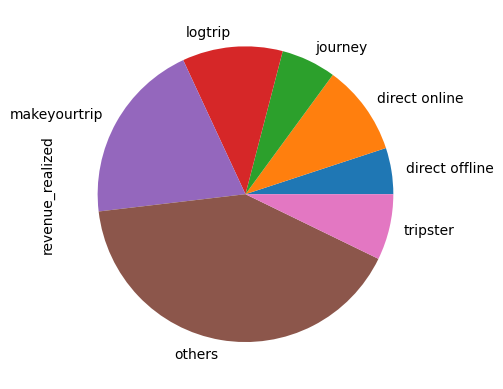

In [96]:
# Ans -
df_bookings.groupby("booking_platform")["revenue_realized"].sum().plot(kind="pie")